In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

import matplotlib.pyplot as plt

2024-06-03 21:02:55.727251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_images, train_labels),  (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

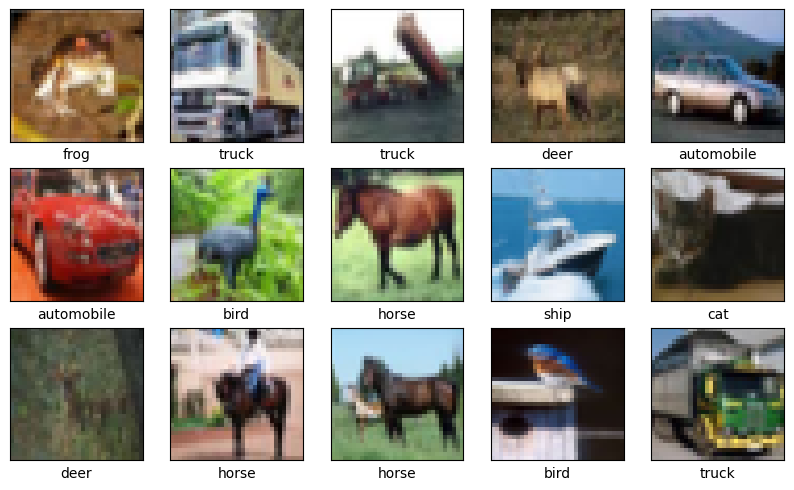

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])

    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [17]:
## Creating the Convolutional Neural Network model 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='leaky_relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='leaky_relu'))
model.add(layers.MaxPooling2D((2, 2)))

## Neural Network
model.add(layers.Flatten())
model.add(layers.Dense(56, activation='leaky_relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10))

## Display model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 56)               

In [19]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-5, verbose=1, mode='auto')

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[reduce_lr])

Epoch 1/50
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4530 - accuracy: 0.4796 - val_loss: 1.1212 - val_accuracy: 0.6055 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1251 - accuracy: 0.6055 - val_loss: 1.0594 - val_accuracy: 0.6340 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0110 - accuracy: 0.6460 - val_loss: 0.9580 - val_accuracy: 0.6665 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9428 - accuracy: 0.6713 - val_loss: 0.9266 - val_accuracy: 0.6815 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8785 - accuracy: 0.6917 - val_loss: 0.9461 - val_accuracy: 0.6762 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8298 - accuracy: 0.7094 - val_loss: 0.8992 - val_accuracy: 0.6931 - lr: 0.0010
Epoch 7/50
1563/1563 [========================

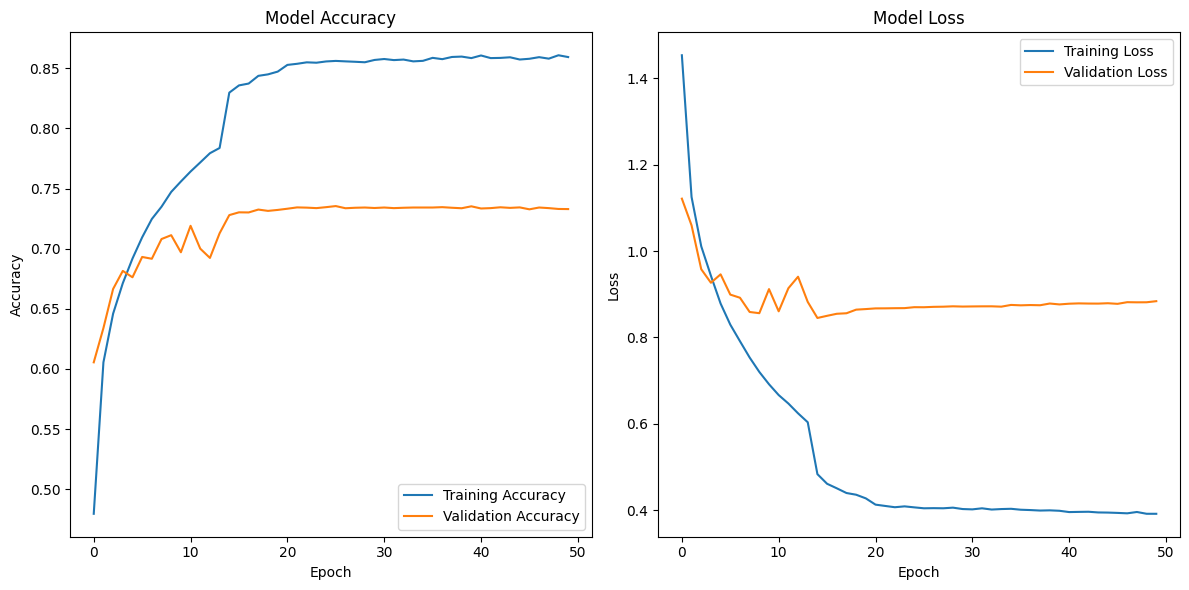

In [21]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

# Calculate the accuracy score
test_accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Accuracy Score: {test_accuracy:.3f}")

# Calculate the F1 Score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1:.3f}")

313/313 [==============================] - 4s 13ms/step - loss: 0.8840 - accuracy: 0.7329
Test accuracy: 0.7329000234603882
Test loss: 0.8840197324752808
Accuracy Score: 0.731
F1 Score: 0.731


In [23]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_labels.flatten()

313/313 [==============================] - 4s 12ms/step


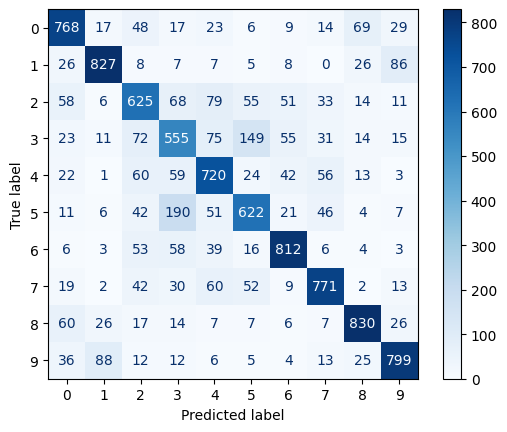

In [24]:
# Compute and display the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()